<a href="https://colab.research.google.com/github/katie0809/2022Military-Chatbot-jupyter/blob/main/source/22'Military_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version History

|version|Score|Changes|Comment|
|-|-|-|-|
|1.0|-|Initial model| 22.07.13 |

## Environments

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
##### SETTINGS FOR COLAB
# API_URL_SAMPLE='https://openapi.mnd.go.kr/3232313634343937343732313632313430/xml/DS_MND_ENLSTMN_DCNT_BEF_INF/1/5/'
# HOME_PATH='/content/drive/MyDrive'
# WORK_DIR=HOME_PATH+'/Colab Notebooks'
# FILES_DIR='/assets'
# MODEL_DIR=WORK_DIR+'/models'

##### SETTINGS FOR LOCAL
API_URL_SAMPLE='https://openapi.mnd.go.kr/3232313634343937343732313632313430/xml/DS_MND_ENLSTMN_DCNT_BEF_INF/1/5/'
HOME_PATH='E:\\Workspace\\Git'
WORK_DIR=HOME_PATH+'/2022Military-Chatbot-jupyter'
FILES_DIR='/assets'
MODEL_DIR=WORK_DIR+'/models'

In [2]:
%cd $WORK_DIR

E:\Workspace\Git\2022Military-Chatbot-jupyter


In [3]:
!python3 --version

Python 3.8.10


## Mecab 설치(Colab)
:한국어 형태소분석기 

In [4]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-07-27 09:00:46--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.84.18, 2620:100:6034:18::a27d:5412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.84.18|:443... connected.
Unable to establish SSL connection.
--2022-07-27 09:01:02--  https://www.dropbox.com/s/i8girnk5p80076c/mecab-ko-dic-2.1.1-20180720.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.84.18, 2620:100:6034:18::a27d:5412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.84.18|:443... connected.
Unable to establish SSL connection.
Cloning into 'mecab-python-0.996'...
fatal: unable to access 'https://bitbucket.org/eunjeon/mecab-python-0.996.git/': server certificate verification failed. CAfile: none CRLfile: none
-bash: line 21: pip: command not found


## Mecab 설치(Window 10)
- pip install로 konlpy 설치 후 아래 링크 따라서 Mecab 설치
- https://uwgdqo.tistory.com/363

#### 동작 확인 

In [4]:
# 정상 동작 확인
from konlpy.tag import Okt, Mecab

okt = Okt()
# mecab = Mecab() # for Mecab installed in colab
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic") # for Mecab installed in local PC

In [5]:
okt.morphs('한글 형태소 분석기(오케이티)로 테스트를 해보았습니다. 정상 설치 및 동작이 잘 됩니다.')

['한글',
 '형태소',
 '분석',
 '기',
 '(',
 '오',
 '케이티',
 ')',
 '로',
 '테스트',
 '를',
 '해보았습니다',
 '.',
 '정상',
 '설치',
 '및',
 '동작',
 '이',
 '잘',
 '됩니다',
 '.']

In [6]:
mecab.morphs('한글 형태소 분석기(미켑)로 테스트를 해보았습니다. 정상 설치 및 동작이 잘 됩니다.')

['한글',
 '형태소',
 '분석기',
 '(',
 '미',
 '켑',
 ')',
 '로',
 '테스트',
 '를',
 '해',
 '보',
 '았',
 '습니다',
 '.',
 '정상',
 '설치',
 '및',
 '동작',
 '이',
 '잘',
 '됩니다',
 '.']

### Mecab 사용자 사전 추가 
- 예시 : '모바일서비스팀' 사용자 사전 추가 

In [13]:
mecab.morphs('코스콤 모바일서비스팀은 맨날 야근한다.')

['코스콤', '모바일', '서비스', '팀', '은', '맨날', '야근', '한다', '.']

In [24]:
# mecab-ko-dic이 다운되어있는 위치로 이동 

##### COLAB
# MECAB_DIR="/tmp/mecab-ko-dic-2.1.1-20180720/"
# %cd /tmp/mecab-ko-dic-2.1.1-20180720/

#### LOCAL PC
MECAB_DIR="C:\mecab"
%cd $MECAB_DIR
!ls

C:\mecab


'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [25]:
# 미리 만들어둔 사용자 사전 nnp파일 read
with open(WORK_DIR+"/files/nnp.csv", 'r', encoding='utf-8') as f:
  file_new = f.readlines()
file_new

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '모바일서비스팀,,,,NNP,*,F,모바일서비스팀,*,*,*,*,*']

In [30]:
# 기존 /user-dic/nnp.csv 파일에 내용 추가한다 
with open(MECAB_DIR+"/user-dic/nnp.csv", 'w', encoding='utf-8') as f:
  for line in file_new:
    f.write(line)

%cat ./user-dic/nnp.csv

UsageError: Line magic function `%cat` not found.


In [32]:
# mecab의 tool 사용해 추가한 내용으로 다시 빌드
# !bash ./tools/add-userdic.sh
!bash ./tools/add-userdic-win.ps1

./tools/add-userdic-win.ps1: line 1: =: command not found
./tools/add-userdic-win.ps1: line 26: unexpected EOF while looking for matching `"'
./tools/add-userdic-win.ps1: line 39: syntax error: unexpected end of file


In [31]:
# !make install
!bash ./tools/compile-win.ps1

make[1]: Entering directory '/tmp/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/tmp/mecab-ko-dic-2.1.1-20180720'


In [7]:
# 사용자 사전은 적용됐지만 단어 분해시 우선순위가 낮아서 원하는 형태로 적용되지 않음 
# /tmp/mecab-ko-dic-2.1.1-20180720/tools# ./mecab-bestn.sh 
# #표현층,품사,의미부류,좌문맥ID,우문맥ID,낱말비용,연접비용,누적비용
# 모바일서비스팀 
# 모바일서비스팀  NNP,,1786,3545,2953,-1885,1068
# EOS
# 모바일  NNP,,1786,3546,2953,-1885,1068
# 서비스  NNG,,1780,3533,1916,281,3265
# 팀      NNG,,1780,3534,2188,269,5722
# EOS

# !bash ./tools/mecab-bestn.sh
mecab.morphs('코스콤 모바일서비스팀은 맨날 야근한다.')

['코스콤', '모바일서비스팀', '은', '맨날', '야근', '한다', '.']

In [33]:
# 우선순위 조정(단어비용 낮추기) => https://mondayus.tistory.com/46
!sudo make clean
!sudo make install

대우,,,,NNP,*,F,대우,*,*,*,*,*

구글,,,,NNP,*,T,구글,*,*,*,*,*

모바일서비스팀,,,,NNP,*,F,모바일서비스팀,*,*,*,*,*


In [8]:
# 결과확인 
# 모바일서비스팀 
# 모바일서비스팀  NNP,,1786,3545,0,-1885,-1885
# EOS
# 모바일  NNP,,1786,3546,2953,-1885,1068
# 서비스  NNG,,1780,3533,1916,281,3265
# 팀      NNG,,1780,3534,2188,269,5722
# EOS
mecab.morphs('코스콤 모바일서비스팀은 맨날 야근한다.')

['코스콤', '모바일서비스팀', '은', '맨날', '야근', '한다', '.']

#### FastText
: https://pypi.org/project/fasttext/

In [ ]:
# !git clone https://github.com/facebookresearch/fastText.git
%cd $WORK_DIR
# !wget https://files.pythonhosted.org/packages/a4/86/ff826211bc9e28d4c371668b30b4b2c38a09127e5e73017b1c0cd52f9dfa/fasttext-0.8.3.tar.gz
# !tar -xvf fasttext-0.8.3.tar.gz

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%cd $WORK_DIR/fasttext-0.8.3
!pip install .

/content/drive/MyDrive/Colab Notebooks/fasttext-0.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/Colab Notebooks/fasttext-0.8.3
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for fasttext: filename=fasttext-0.8.3-cp37-cp37m-linux_x86_64.whl size=1090234 sha256=6bf9cdee02f3fbfc4fcc4ee8b86618769cb1cc22bec5b3490e0884e82728d358
  Stored in directory: /root/.cache/pip/wheels/04/f5/eb/01dae2ec6c6262cc2e650bb47ddb89100623ad833336ad2568
Successfully built fasttext


#### 3i4k 한국어 문장 의도분류모델

In [ ]:
# 소스 다운로드
%cd $WORK_DIR
# !git clone https://github.com/warnikchow/3i4k.git

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# 3i4k 의존모듈 설치 
%cd $WORK_DIR/3i4k
!pip install -r Requirements.txt

/content/drive/MyDrive/Colab Notebooks/3i4k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 304 kB 5.1 MB/s 
     |████████████████████████████████| 1.4 MB 77.5 MB/s 
     |████████████████████████████████| 4.9 MB 81.4 MB/s 
     |████████████████████████████████| 1.6 MB 70.2 MB/s 
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.4.1 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow-gpu==1.4.1


In [ ]:
# Tensorflow 버전 하향
!pip uninstall tensorflow
!pip install tensorflow==1.15

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 21 kB/s 
     |████████████████████████████████| 503 kB 76.6 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 3.8 MB 75.2 MB/s 
  Created wheel 

In [ ]:
!pip install Keras==2.1.2
!pip install nltk==3.3
!pip install librosa==0.6.1
!pip3 install numba==0.48.0
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.0 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.1.2 which is incompatible.
kapre 0.3.

In [ ]:
# Word Vectors 다운로드 
# %cd $WORK_DIR/3i4k
# !mkdir vectors
# %cd vectors
# !wget -O model_drama.bin --no-check-certificate "https://drive.google.com/file/d/1jHbjOcnaLourFzNuP47yGQVhBTq6Wgor"
# !unzip vectors.zip

In [ ]:
%cd $WORK_DIR/3i4k
!python3 3i4k_demo.py

/content/drive/MyDrive/Colab Notebooks/3i4k












#########################################################
#                                                       #
#       Demonstration video: 3i for Korean (3i4K)       #
#                                                       #
#########################################################
Using TensorFlow backend.


2022-07-19 10:16:19.545749: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-07-19 10:16:19.550074: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200220000 Hz
2022-07-19 10:16:19.550659: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x47178bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-19 10:16:19.550690: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-07-19 

In [ ]:
from classify import pred_only_text

In [ ]:
print(pred_only_text('배고프다 점심 뭐먹지?'))

# Install Libraries

In [12]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install sklearn
# !pip install tensorflow

# Import Libraries

In [63]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [64]:
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)
print(tf.keras.__version__)

2.2.0
0.22.1
1.18.1
1.0.1
2.3.0-tf


In [101]:
ddd = dict()
dd['dhdh'] = 'r'
dd['dhddh'] = 'r'
len(ddd)

0

# Dataset Load
- 데이터셋 class 부여
- 데이터셋 전체 통합 후 섞기

In [102]:
def load_dataset(path=WORK_DIR, prefix='train_'):
    idxs = dict()
    ret = pd.DataFrame(columns=['question', 'class', 'label'])
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            if filename.startswith(prefix):
                filepath = os.path.join(dirname, filename)
                df = pd.read_csv(filepath)
                df_class = filename.split('_')[1].split('.')[0]
                df_label = len(idxs)
                
                df['class'] = df_class
                df['label'] = df_label
                idxs[df_label] = df_class
                
                ret = pd.concat([ret, df])
    return ret, idxs

In [103]:
train, idxs = load_dataset()
train = train.sample(frac=1).reset_index(drop=True)
train

,question,class,label
0,수서쪽에 할인되는 곳 있긴해?,welfare,1
1,디오션리조트호텔 혜택정보 궁금함,welfare,1
2,대위 2009년 월급 알려줘,pay,0
3,일병 5호봉 봉급 알려줘,pay,0
4,충청부근 복지정보 있긴해?,welfare,1
...,...,...,...
6555,캠퍼트리호텔&리조트에 대해 궁금해,welfare,1
6556,소령 1990년도에 수입 얼마,pay,0
6557,인제스피디움 혜택정보 궁금함,welfare,1
6558,중사 8호봉 월급 얼마야,pay,0


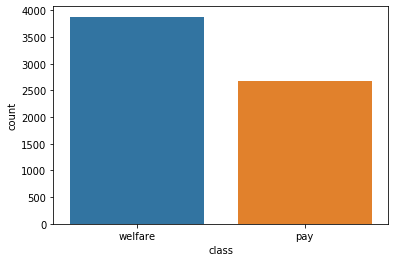

In [51]:
sns.countplot(train['class'])

In [104]:
idxs

{0: 'pay', 1: 'welfare'}

## 질문 전처리

In [44]:
questions = train['question'].apply(mecab.morphs)
questions

0            [충남, 쪽, 에, 놀, 만, 한, 곳, 궁금, 해]
1                     [한화, 거제, 에, 대해, 알려줘]
2            [소노, 문, 델피노, 혜택, 정보, 말, 해, 줘]
3        [제천, 부근, 갈만, 한, 곳, 뭐, 가, 있, 어, ?]
4             [원사, 21, 호봉, 급여, 알, 고, 싶, 어]
                       ...                
6555              [서대전, 부근, 잘, 데, 있, 어, ?]
6556             [대위, 2003, 연도, 연봉, 궁금, 함]
6557           [수원, 쪽, 에, 갈, 만, 한, 곳, 알려줘]
6558           [상사, 1988, 년, 에, 수입, 얼마, 임]
6559    [세인트, 포, 골프, &, 리조트, 에, 대해, 궁금, 해]
Name: question, Length: 6560, dtype: object

MAX LEN : 15
AVG LEN : 6.947713414634146


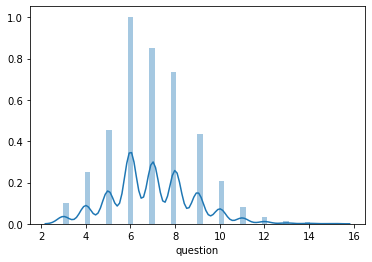

In [53]:
# 질문 분포 확인
sns.distplot(questions.apply(len))
print('MAX LEN :',max(len(l) for l in questions))
print('AVG LEN :',sum(map(len, questions))/len(questions))

In [54]:
max_len = max(len(l) for l in questions)

## 토큰화

In [65]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)

In [69]:
train2 = tokenizer.texts_to_sequences(questions)

In [70]:
train2[:5]

[[189, 30, 3, 47, 41, 26, 19, 2, 1],
 [76, 82, 3, 12, 18],
 [38, 83, 217, 5, 6, 16, 1, 17],
 [149, 37, 58, 26, 19, 51, 48, 7, 4, 8],
 [71, 129, 9, 22, 13, 14, 15, 4]]

In [83]:
intent_label_size = train['label'].nunique()
vocab_size = len(tokenizer.word_index) + 1
print("총 의도의 개수는 : ", intent_label_size)
print("총 단어의 개수는 : ", vocab_size)

총 의도의 개수는 :  2
총 단어의 개수는 :  542


## 패딩

In [71]:
padded = pad_sequences(train2, maxlen=max_len)

# 학습 셋 분리

In [72]:
from sklearn.model_selection import train_test_split

# Dataframe을 ratio비율로 분할해 반환
def df_split(df, ratio=0.2):
    idx = np.round(len(df) * ratio)
    return df[:idx], df[idx:]

# x_train, x_valid, y_train, y_valid 반환
def train_valid_split(x_df, y_df, ratio=0.2):
    return train_test_split(x_df, y_df, test_size=ratio, random_state=42, stratify=y_df)

In [76]:
x_train, x_valid, y_train, y_valid = train_valid_split(padded, train['label'])
display(x_train, x_valid)

array([[ 0,  0,  0, ...,  7,  4,  8],
       [ 0,  0,  0, ..., 50,  1,  8],
       [ 0,  0,  0, ...,  7, 49,  8],
       ...,
       [ 0,  0,  0, ..., 16,  1, 17],
       [ 0,  0,  0, ..., 16,  1, 17],
       [ 0,  0,  0, ..., 28,  6, 18]])

array([[ 0,  0,  0, ..., 16,  1, 17],
       [ 0,  0,  0, ..., 23,  2, 11],
       [ 0,  0,  0, ...,  7, 54,  8],
       ...,
       [ 0,  0,  0, ..., 22, 10, 34],
       [ 0,  0,  0, ..., 16,  1, 17],
       [ 0,  0,  0, ...,  7, 54,  8]])

## Target 인코딩

In [86]:
y_train = to_categorical(y_train, num_classes=intent_label_size)
y_valid = to_categorical(y_valid, num_classes=intent_label_size)

In [90]:
%pwd

'E:\\Workspace\\Git\\2022Military-Chatbot-jupyter'

# 모델 학습 

In [79]:
import pickle
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [84]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128))
model.add(Dense(intent_label_size, activation='softmax'))

In [85]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint(WORK_DIR+'/models/intent_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [88]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=5, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/5
131/132 [============================>.] - ETA: 0s - loss: 0.0990 - acc: 0.9571
Epoch 00001: val_acc improved from -inf to 1.00000, saving model to skku_best_intent_model.h5
132/132 [==============================] - 2s 15ms/step - loss: 0.0989 - acc: 0.9571 - val_loss: 2.3527e-05 - val_acc: 1.0000
Epoch 2/5
132/132 [==============================] - ETA: 0s - loss: 2.0245e-05 - acc: 1.0000
Epoch 00002: val_acc did not improve from 1.00000
132/132 [==============================] - 1s 9ms/step - loss: 2.0245e-05 - acc: 1.0000 - val_loss: 9.4164e-06 - val_acc: 1.0000
Epoch 3/5
130/132 [============================>.] - ETA: 0s - loss: 7.1573e-06 - acc: 1.0000
Epoch 00003: val_acc did not improve from 1.00000
132/132 [==============================] - 1s 10ms/step - loss: 7.1287e-06 - acc: 1.0000 - val_loss: 5.6850e-06 - val_acc: 1.0000
Epoch 4/5
130/132 [============================>.] - ETA: 0s - loss: 4.5460e-06 - acc: 1.0000
Epoch 00004: val_acc did not improve from 1.00000

## 모델 저장

In [92]:
loaded_model = load_model(WORK_DIR+'/models/intent_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_valid, y_valid)[1]))

41/41 [==============================] - 0s 3ms/step - loss: 2.8118e-05 - acc: 1.0000

 테스트 정확도: 1.0000


## 토크나이저 저장

In [93]:
# saving
with open(WORK_DIR+'/files/intent_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [94]:
with open(WORK_DIR+'/files/intent_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

# 테스트

In [121]:
def predict(new_sentence, label_to_intent=idxs):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  encoded = loaded_tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  y_predicted = loaded_model.predict(pad_new) # 예측
  max_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
  return label_to_intent[max_predicted[0]], y_predicted

In [122]:
predict('봉급 얼마임?')

('pay', array([[9.999900e-01, 9.961439e-06]], dtype=float32))

In [123]:
predict('여의도 근처 놀데 있나?')

('welfare', array([[2.2982522e-06, 9.9999774e-01]], dtype=float32))

In [ ]:
pre